<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/Modelo_Avance_Proyecto_2do_AL263158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance del Proyecto

Factores de Riesgo y Predicción de Enfermedades Cardíacas


**Etapas: Métricas de Calidad de los Datos, Análisis Descriptivo y Preprocesamiento**

Nombre:  Carmen Yolanda Hion Vela

Matrícula: AL263158

Fecha: 01/10/2025

## 1) Introducción
- Descripción breve del problema que se pretende abordar.
- Objetivo general del proyecto y objetivos específicos.
- Contexto del dataset en relación con el problema planteado.

###- Descripción del problema:
Las enfermedades cardiovasculares (ECV) representan la principal causa de mortalidad a nivel mundial, siendo responsables de una cifra estimada de 19,8 millones de muertes anuales, de acuerdo con los datos de la Organización Mundial de la Salud (OMS) para el año 2022. Estas muertes constituyen aproximadamente el 32% del total de defunciones globales. La complejidad y alta incidencia de las ECV definen un problema crítico de salud pública.



### Objetivo general
Implementar un modelo predictivo para identificar a pacientes con alto riesgo de enfermedad cardiovascular, utilizando factores clínicos para facilitar la toma de decisiones para acciones preventivas y la detección temprana.

#### Objetivos Específicos:
- Determinar, mediante el análisis estadístico, cuáles son los factores de riesgo con la mayor relevancia estadística para la presencia de la enfermedad cardíaca.

- Cuantificar y corregir en la medida de lo posible la presencia de anomalías asegurando la calidad de los datos.

- Cuantificar la eficacia y la utilidad analítica del proceso para validar la capacidad de identificar y clasificar el riesgo de la enfermedad cardíaca.


###-Contexto del dataset:
El dataset proporciona el conjunto de datos necesario para confirmar, mediante análisis estadístico y visual, qué indicadores clínicos son los más fiables para construir una herramienta de predicción temprana de enfermedades cardíacas.

## 2) Descripción del dataset
- Fuente de los datos.
- Número de registros y variables.
- Variables principales de interés.
- Limitaciones del dataset.
## Fuente de los datos:
Conjunto de datos de predicción de fallo cardíaco (Heart Failure Prediction), que contiene registros de pacientes y diversas variables asociadas con el riesgo cardiovascular.

* *Nombre del Dataset:* Heart Failure Prediction
* *Plataforma*: Kaggle
* *Enlace*: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Formato de los datos:** Los datos están en formato CSV (Comma Separated Values).

**Volumen de Datos:**
* 918 registros de pacientes.
* 12 variables. (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope and HeartDisease).

## Variables de interes - Factores de riesgo:
* HeartDisease - Categórica.
* Age	Numérica.
* FastingBS	Categórica.
* ExerciseAngina	Categórica.
* ChestPainType	Categórica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/ClassFiles/datos/heart.csv')

print("Dimensiones:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 3) Preguntas de análisis descriptivo
* ¿Cuál es la distribución del objetivo del análisis (Pacientes con enfermedad cardiaca)?
* ¿Cómo se relaciona la edad con la enfermedad cardíaca?
* ¿Cuál es el impacto de los factores de riesgo categoricos?
* ¿Qué tan altos son los valores típicos de Colesterol y Presión Arterial (RestingBP) en el grupo de pacientes enfermos, y cuánto se diferencian estos niveles de los valores encontrados en el grupo sano?

## 4) Métricas de calidad de los datos

Conteo de valores faltantes por columna:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Matriz de datos logicos
       Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    False  False          False      False        False      False   
1    False  False          False      False        False      False   
2    False  False          False      False        False      False   
3    False  False          False      False        False      False   
4    False  False          False      False        False      False   
..     ...    ...            ...        ...          ...        ...   
913  False  False          False      False        False      False   
914  False  False          False      False        False      False   
915  False  False          False      Fals

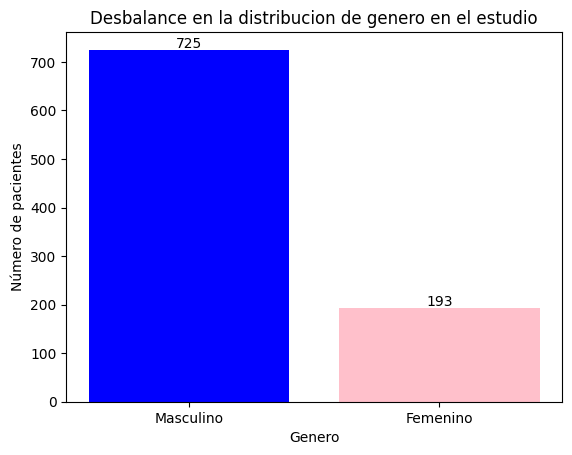

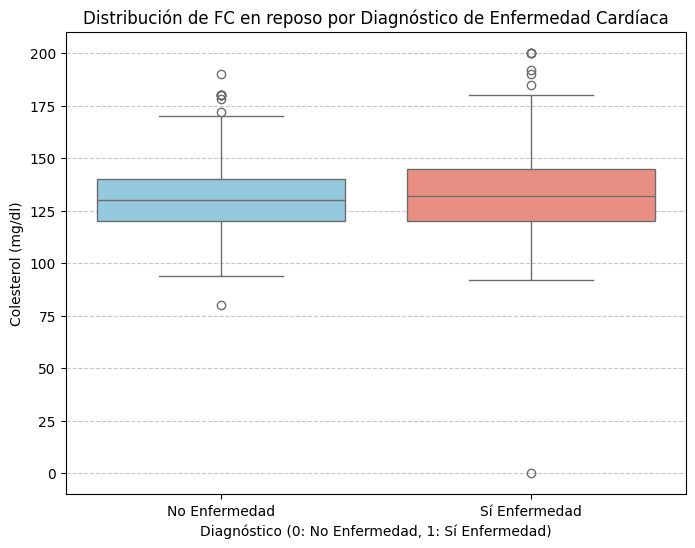

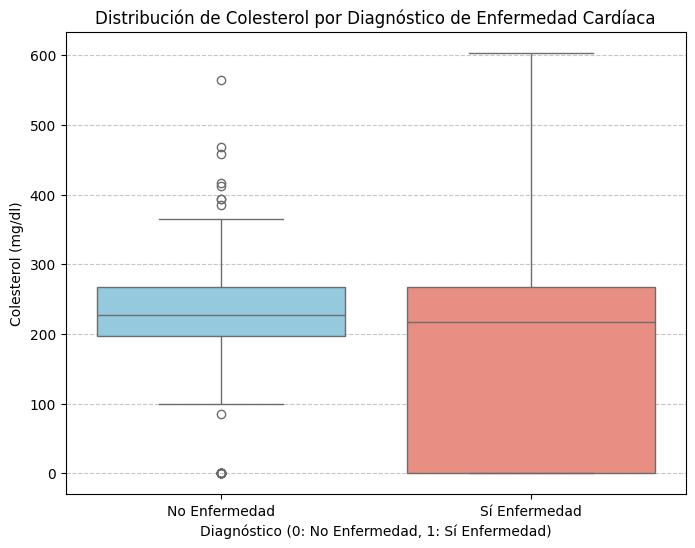

In [ ]:
# Valores faltantes $
print("Conteo de valores faltantes por columna:")
print(df.isnull().sum())

print('\nMatriz de datos logicos')
print(df.isnull())

# Duplicados
registros_duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {registros_duplicados}")
# Tipos de datos
df.dtypes

#Cambio de variables categoricas
variables_a_convertir = [
    'Sex',
    'ChestPainType',
    'FastingBS',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope',
    'HeartDisease'
]
print("\nVariables categoricas identificadas:")
for cat in variables_a_convertir:
    print(f"- {cat}")

for columna in variables_a_convertir:
    df[columna] = df[columna].astype('category')

print("\nTipos de datos despues de la conversion")
print(df.dtypes)


sex_counts = df['Sex'].value_counts()
colors = ['blue' , 'pink'] # Define a list of colors for each bar

plt.bar(sex_counts.index, sex_counts.values, color=colors) # Use plt.bar with specified colors
plt.title('Desbalance en la distribucion de genero en el estudio')
plt.xlabel('Genero')
plt.ylabel('Número de pacientes')
plt.xticks(sex_counts.index, labels=['Masculino', 'Femenino'], rotation=0) # Set custom labels
for i, count in enumerate(sex_counts.values):
    plt.text(i, count + 5, str(count), ha='center') #
plt.show()

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(
    x='HeartDisease',
    y='RestingBP',
    data=df,
    palette=['skyblue', 'salmon'], # Colores para cada caja
    hue='HeartDisease',            # Sintaxis recomendada para asignar colores
    legend=False                   # Se omite la leyenda, ya que el eje X la explica
)

plt.title('Distribución de FC en reposo por Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Sí Enfermedad)')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['No Enfermedad', 'Sí Enfermedad']) # Etiquetas personalizadas en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(
    x='HeartDisease',
    y='Cholesterol',
    data=df,
    palette=['skyblue', 'salmon'], # Colores para cada caja
    hue='HeartDisease',            # Sintaxis recomendada para asignar colores
    legend=False                   # Se omite la leyenda, ya que el eje X la explica
)

plt.title('Distribución de Colesterol por Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Sí Enfermedad)')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['No Enfermedad', 'Sí Enfermedad']) # Etiquetas personalizadas en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 5) Análisis descriptivo de los datos

###- Estadísticos básicos (media, mediana, moda, varianza, percentiles).

In [ ]:
# Estadísticos básicos
df.describe()
print(df.describe())


              Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564  136.809368    0.887364
std      9.432617   18.514154   109.384145   25.460334    1.066570
min     28.000000    0.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000  120.000000    0.000000
50%     54.000000  130.000000   223.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000


###- Tablas de frecuencia para variables categóricas.

In [ ]:
columnas_categoricas = df.select_dtypes(include=['category']).columns
for columna in columnas_categoricas:
    print(f"\nFrecuencia de variable categorica: '{columna}':")
    print(df[columna].value_counts())


Frecuencia de variable categorica: 'Sex':
Sex
M    725
F    193
Name: count, dtype: int64

Frecuencia de variable categorica: 'ChestPainType':
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Frecuencia de variable categorica: 'FastingBS':
FastingBS
0    704
1    214
Name: count, dtype: int64

Frecuencia de variable categorica: 'RestingECG':
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Frecuencia de variable categorica: 'ExerciseAngina':
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Frecuencia de variable categorica: 'ST_Slope':
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Frecuencia de variable categorica: 'HeartDisease':
HeartDisease
1    508
0    410
Name: count, dtype: int64


###-	Graficos, tablas y mapas




<Figure size 1400x1200 with 0 Axes>

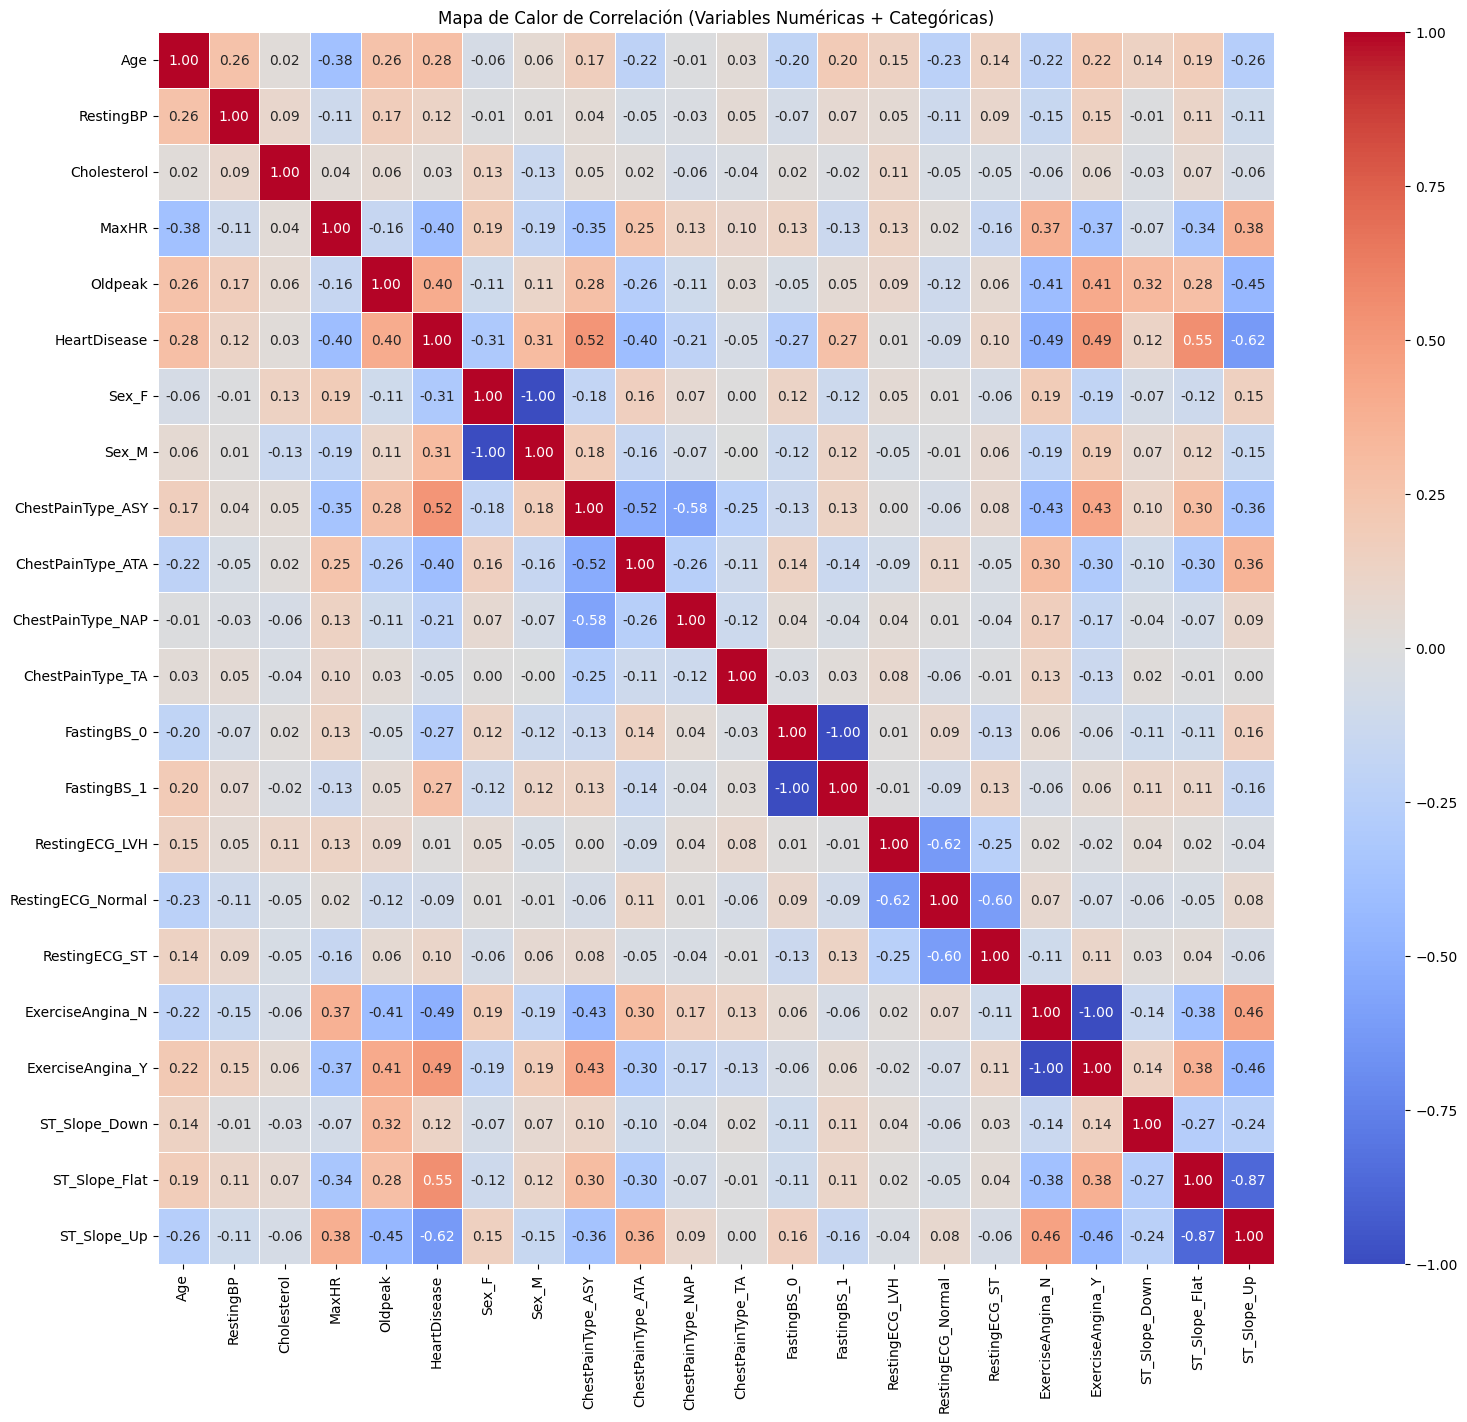


Correlación de las 10 variables más predictivas con HeartDisease:
HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS_1          0.267291
ST_Slope_Down        0.122527
RestingBP            0.117798
Name: HeartDisease, dtype: float64


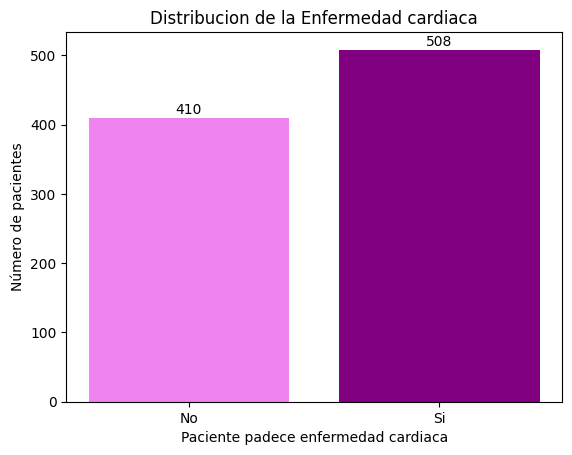

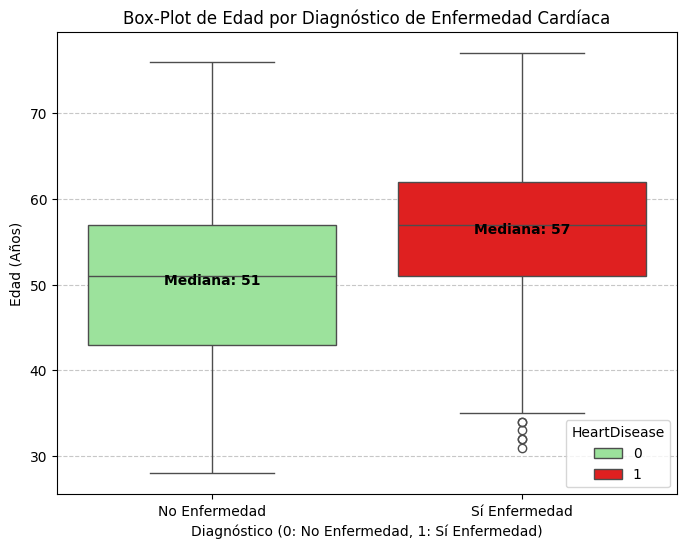

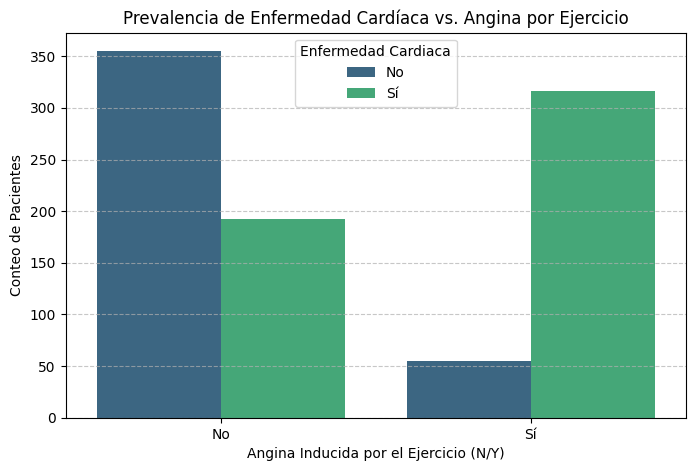

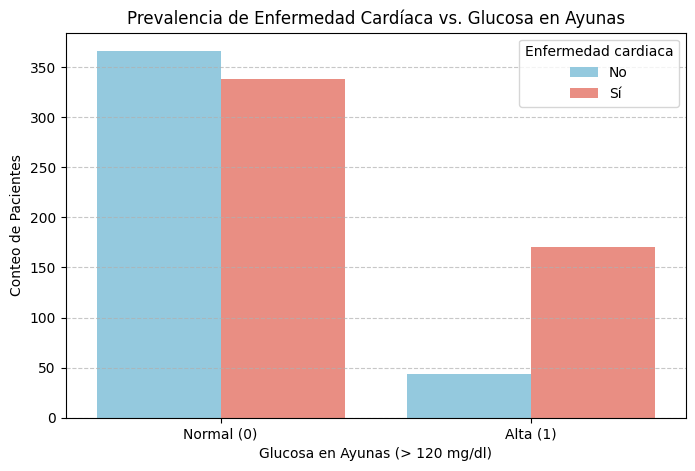

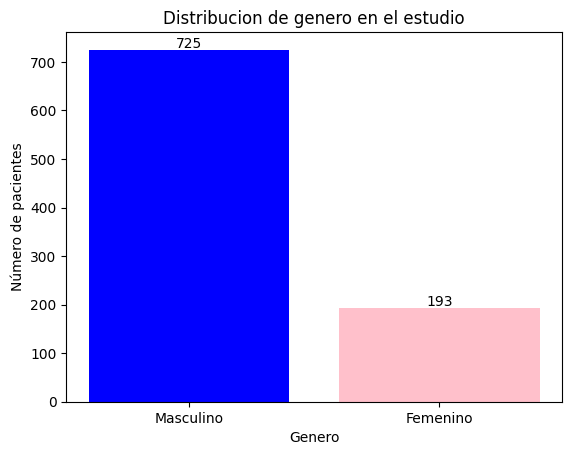

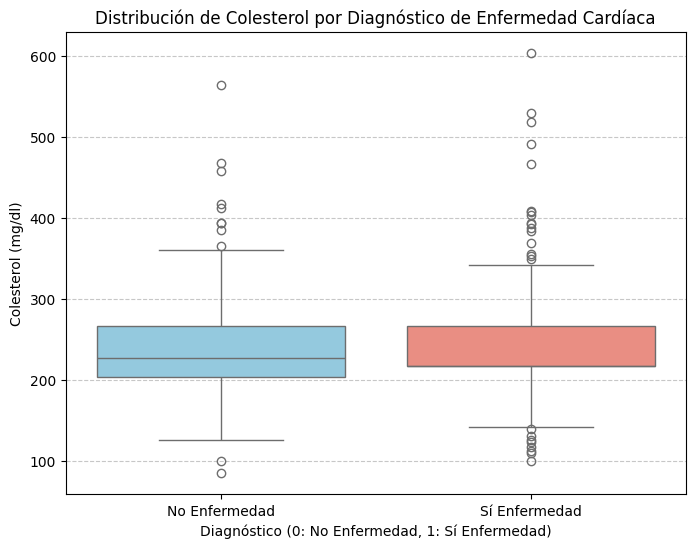

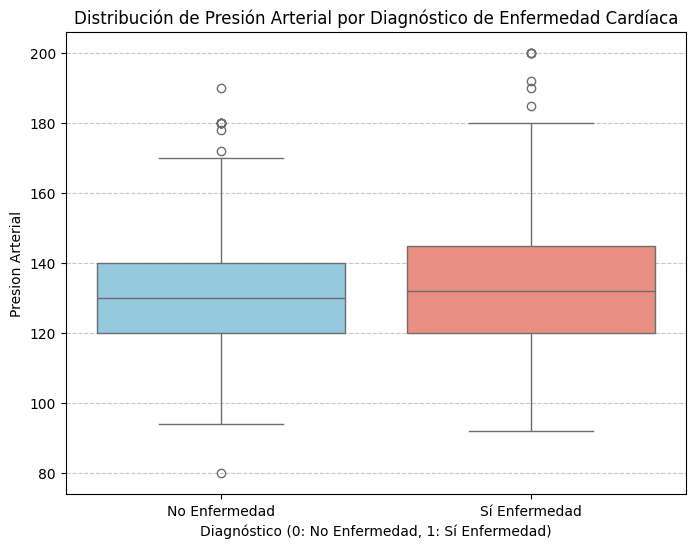

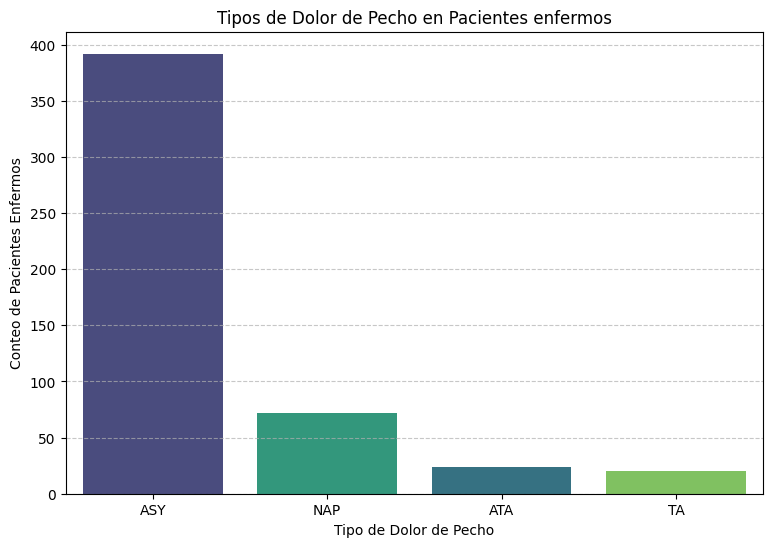

In [ ]:


df_temp_encoded = df.copy()
columnas_categoricas = df_temp_encoded.select_dtypes(include=['category', 'object']).columns.tolist()
if 'HeartDisease' in columnas_categoricas:
    columnas_categoricas.remove('HeartDisease')
df_temp_encoded = pd.get_dummies(df_temp_encoded, columns=columnas_categoricas)

X = df.drop('HeartDisease', axis=1) # Features
Y = df['HeartDisease'] # Target





# Configurar el gráfico
plt.figure(figsize=(14, 12))
matriz_correlacion = df_temp_encoded.corr()

# Configurar el gráfico
plt.figure(figsize=(18, 16)) # Aumentamos el tamaño porque ahora hay más columnas

# Generar el Mapa de Calor
sns.heatmap(
    matriz_correlacion,
    annot=True,            # Por defecto, no mostrar coeficientes si hay muchas variables
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)

plt.title('Mapa de Calor de Correlación (Variables Numéricas + Categóricas)')
plt.show()

# Opcional: Mostrar correlaciones de la variable objetivo
print("\nCorrelación de las 10 variables más predictivas con HeartDisease:")
print(matriz_correlacion['HeartDisease'].sort_values(ascending=False).head(10))

# ¿Cuál es la distribución del objetivo del análisis (Pacientes con enfermedad cardiaca)?
heart_disease_counts = df['HeartDisease'].value_counts().reindex([0, 1])
colors = ['violet', 'purple'] # Define a list of colors for each bar

plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=colors) # Use plt.bar with specified colors
plt.title('Distribucion de la Enfermedad cardiaca')
plt.xlabel('Paciente padece enfermedad cardiaca')
plt.ylabel('Número de pacientes')
plt.xticks(heart_disease_counts.index, labels=['No', 'Si'], rotation=0) # Set custom labels
for i, count in enumerate(heart_disease_counts.values):
    plt.text(i, count + 5, str(count), ha='center') #
plt.show()

#¿Cómo se relaciona la edad con la enfermedad cardíaca?

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='HeartDisease',
    y='Age',
    data=df,
    hue='HeartDisease',
    palette=['lightgreen', 'red']
)

mediana_no = df[df['HeartDisease'] == 0]['Age'].median()
mediana_si = df[df['HeartDisease'] == 1]['Age'].median()

plt.text(
    x=0,
    y=mediana_no - 1,
    s=f'Mediana: {mediana_no:.0f}',
    color='black',
    ha='center',
    weight='bold'
)

plt.text(
    x=1,
    y=mediana_si - 1,
    s=f'Mediana: {mediana_si:.0f}',
    color='black',
    ha='center',
    weight='bold'
)

plt.title('Box-Plot de Edad por Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Sí Enfermedad)')
plt.ylabel('Edad (Años)')
plt.xticks([0, 1], ['No Enfermedad', 'Sí Enfermedad'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ¿Cuál es el impacto de los factores de riesgo?

#Excersice angina -- dolor de pecho que se produce cuando el músculo del corazón no recibe suficiente sangre oxigenada
plt.figure(figsize=(8, 5))
sns.countplot(
    x='ExerciseAngina',
    hue='HeartDisease',
    data=df,
    palette='viridis'
)

plt.title('Prevalencia de Enfermedad Cardíaca vs. Angina por Ejercicio')
plt.xlabel('Angina Inducida por el Ejercicio (N/Y)')
plt.ylabel('Conteo de Pacientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='Enfermedad Cardiaca', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(
    x='FastingBS',
    hue='HeartDisease',
    data=df,
    palette=['skyblue', 'salmon']
)

plt.title('Prevalencia de Enfermedad Cardíaca vs. Glucosa en Ayunas')
plt.xlabel('Glucosa en Ayunas (> 120 mg/dl)')
plt.ylabel('Conteo de Pacientes')
plt.xticks([0, 1], ['Normal (0)', 'Alta (1)'])
plt.legend(title='Enfermedad cardiaca', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sex_counts = df['Sex'].value_counts()
colors = ['blue' , 'pink'] # Define a list of colors for each bar

plt.bar(sex_counts.index, sex_counts.values, color=colors) # Use plt.bar with specified colors
plt.title('Distribucion de genero en el estudio')
plt.xlabel('Genero')
plt.ylabel('Número de pacientes')
plt.xticks(sex_counts.index, labels=['Masculino', 'Femenino'], rotation=0) # Set custom labels
for i, count in enumerate(sex_counts.values):
    plt.text(i, count + 5, str(count), ha='center') #
plt.show()


#¿Qué tan altos son los valores típicos de Colesterol y Presión Arterial (RestingBP)
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(
    x='HeartDisease',
    y='Cholesterol',
    data=df,
    palette=['skyblue', 'salmon'], # Colores para cada caja
    hue='HeartDisease',            # Sintaxis recomendada para asignar colores
    legend=False                   # Se omite la leyenda, ya que el eje X la explica
)

mediana_cholesterol_condicional = df[df['HeartDisease'] == 1]['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, mediana_cholesterol_condicional)
mediana_bp = df['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].replace(0, mediana_bp)


plt.title('Distribución de Colesterol por Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Sí Enfermedad)')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['No Enfermedad', 'Sí Enfermedad']) # Etiquetas personalizadas en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(
    x='HeartDisease',
    y='RestingBP',
    data=df,
    palette=['skyblue', 'salmon'], # Colores para cada caja
    hue='HeartDisease',            # Sintaxis recomendada para asignar colores
    legend=False                   # Se omite la leyenda, ya que el eje X la explica
)

plt.title('Distribución de Presión Arterial por Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Sí Enfermedad)')
plt.ylabel('Presion Arterial')
plt.xticks([0, 1], ['No Enfermedad', 'Sí Enfermedad']) # Etiquetas personalizadas en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#¿Qué tipo de dolor de pecho (ChestPainType) tiene mayor prevalencia en los pacientes enfermos?
df_enfermos = df[df['HeartDisease'] == 1]
frecuencia_dolor = df_enfermos['ChestPainType'].value_counts()

plt.figure(figsize=(9, 6))
sns.countplot(
    x='ChestPainType',
    data=df_enfermos, # Usamos el subgrupo 'df_enfermos'
    order=df_enfermos['ChestPainType'].value_counts().index, # Ordena las barras de mayor a menor
    hue='ChestPainType',
    palette='viridis' # Usa una paleta de color para distinción
)

plt.title('Tipos de Dolor de Pecho en Pacientes enfermos')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Conteo de Pacientes Enfermos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42,
    stratify=Y
)

columnas_numericas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

###- Identificación de outliers y patrones relevantes.


**Anomalias:**
- Anomalía del Colesterol (Cholesterol): El valor mínimo de 0.0 es biológicamente imposible. Esto indica una imputación deficiente de valores faltantes en el dataset original.
- Sesgo de Género (Sex): La muestra presenta un severo desbalance de 725 hombres frente a solo 193 mujeres.

**Outliers:**
- RestingBP: Un valor de 0.0 mmHg es imposible para la Presión Arterial en Reposo. Esto es claramente un error de registro o una imputación incorrecta (como el Colesterol=0). Debe tratarse como un dato faltante o ser reemplazado por la mediana.

* Oldpeak: El rango es amplio y extremista.


**Patrones importantes:**
- Riesgo Asintomático (ChestPainType): El tipo de dolor más frecuente es el Asintomático (ASY) (496 registros). Esto subraya que la enfermedad cardíaca es a menudo silenciosa y convierte a ASY en un feature clave de predicción.

- Riesgo por Edad: La mediana de edad de la población es madura (54 años), lo que soporta la hipótesis de que la edad es un factor de riesgo crucial.

- Desbalance de Clase: El desbalance de HeartDisease (55% enfermos vs. 45% sanos) es leve y manejable, pero justifica el uso de métricas de desempeño robustas.

###Resumen del Analisis descriptivo
El Análisis Descriptivo (AD) confirma que el riesgo de enfermedad cardíaca está dominado por  ciertos factores que influyen en el diagnóstico; la Angina inducida por el Ejercicio (ExcersiceAngina) y la Glucosa Alta en Ayunas (FastingBS) son los predictores más fuertes, ya que la probabilidad de enfermedad es alta en esos subgrupos.
La Edad también es importante, ya que la mediana del grupo enfermo es 6 años mayor (57 vs. 51 años), y se descubrió que el síntoma más común en los enfermos es el dolor Asintomático (ASY).
Sin embargo, eel analisis enfrenta dos problemas críticos: el sesgo de la población femenina, que constituye una minoría en los datos y podría afectar la precisión del modelo para ese grupo, y la anomalía en la variable Colesterol, donde la presencia de ceros compromete su valor predictivo y requiere a una limpieza de datos.

## 6) Preprocesamiento de los datos

In [ ]:
# Imputación de valores faltantes
#Valores de colesterol 0
mediana_cholesterol_condicional = df[df['HeartDisease'] == 1]['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, mediana_cholesterol_condicional)
mediana_bp = df['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].replace(0, mediana_bp)
print("Anomalías críticas (Colesterol=0, RestingBP=0) tratadas con la mediana condicional/general.")



Anomalías críticas (Colesterol=0, RestingBP=0) tratadas con la mediana condicional/general.


Anomalias generadas por que el valor 0 en ambas variables es biologicamente imposible

In [ ]:

# Eliminación de duplicados
df = df.drop_duplicates()

#Correccion de tipos de datos

#Codificacion de variables categoricas
df_temp_encoded = df.copy()
columnas_categoricas = df_temp_encoded.select_dtypes(include=['category', 'object']).columns.tolist()
if 'HeartDisease' in columnas_categoricas:
    columnas_categoricas.remove('HeartDisease')
df_temp_encoded = pd.get_dummies(df_temp_encoded, columns=columnas_categoricas)


#Estandarizacion de variables numericas
X = df.drop('HeartDisease', axis=1) # Features
Y = df['HeartDisease'] # Target

# 2. División del Dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42,
    stratify=Y # Mantiene la proporción de HeartDisease en ambos conjuntos
)
columnas_numericas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])



Se codificaron las variables categoricas para poder obtener un mapa de correlacion mas adecuado

## 7) Conclusiones parciales
- Principales hallazgos en calidad, análisis descriptivo y preprocesamiento.
- Estado de preparación del dataset para fases posteriores.

Se identificaron puntos críticos que fueron abordados en el preprocesamiento:

Calidad de los Datos: El principal hallazgo fue la anomalía crítica del Colesterol (0.0), un valor imposible que fue tratado como un valor faltante. También se detectó el sesgo de género en la muestra, lo que debe ser considerado para la creacion de datos sinteticos en una siguiente fase del proyecto.


Factores de Riesgo Clave: Se confirmó que la enfermedad está fuertemente asociada a la edad y que la presencia de dolor Asintomático ASY es el predictor categórico más relevante.

Correlación: El Mapa de Calor estableció a las categorías de ST_Slope y ChestPainType como los indicadores más fuertes de la enfermedad.

Mientras que en el preprocesamiento se implementaron acciones para resolver los siguientes problemas:

- Se corrigió la anomalía del Colesterol y RestingBP con el reemplazo por la mediana condicional.

- Se aplicó la codificación para variables categoricas y la estandarización para variables numéricas.

El dataset ha sido completamente limpiado, transformado y estandarizado. Se corrigieron las inconsistencias de valores (Colesterol y Presión Arterial) y se prepararon las variables categóricas.
